<a href="https://colab.research.google.com/github/Noir1607/Data-Science/blob/main/EDA2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import sklearn as sk
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d
from scipy.interpolate import NearestNDInterpolator

In [37]:
iris = load_iris()

In [38]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [39]:
df['spicies'] = iris.target

In [40]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),spicies
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
spicies                int64
dtype: object

In [42]:
df['spicies'].value_counts()

spicies
0    50
1    50
2    50
Name: count, dtype: int64

In [43]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
spicies              0
dtype: int64

In [44]:
df.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),spicies
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


<function matplotlib.pyplot.show(close=None, block=None)>

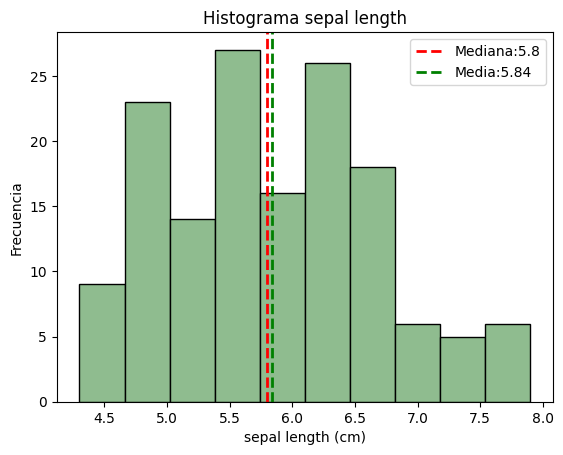

In [45]:
#Estadisticas

media=df['sepal length (cm)'].mean().round(2)
mediana=df['sepal length (cm)'].median()


plt.hist(df['sepal length (cm)'],bins=10,edgecolor='black',color="darkseagreen")

plt.axvline(x=mediana, color='red',linestyle='dashed', linewidth=2, label=f'Mediana:{mediana}')
plt.axvline(x=media, color='green',linestyle='dashed', linewidth=2, label=f'Media:{media}')


plt.ylabel('Frecuencia')
plt.xlabel('sepal length (cm)')
plt.title('Histograma sepal length')
plt.legend()
plt.show

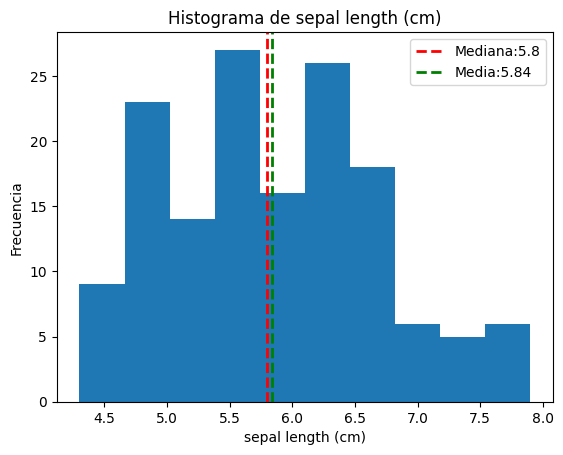

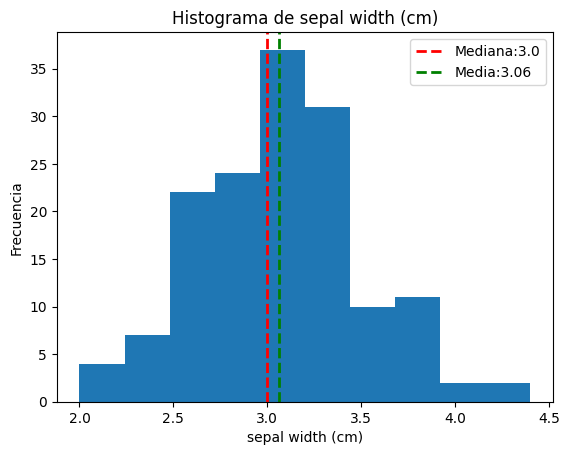

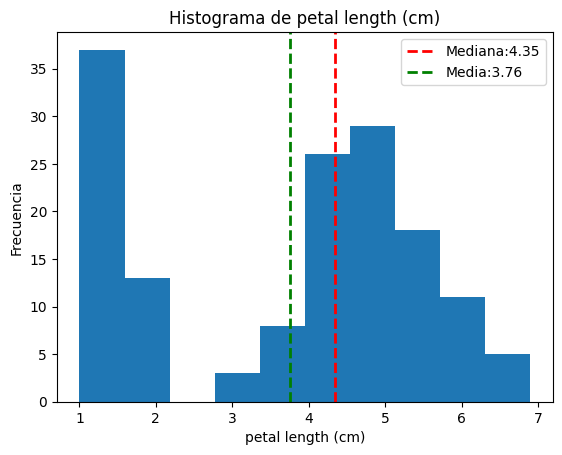

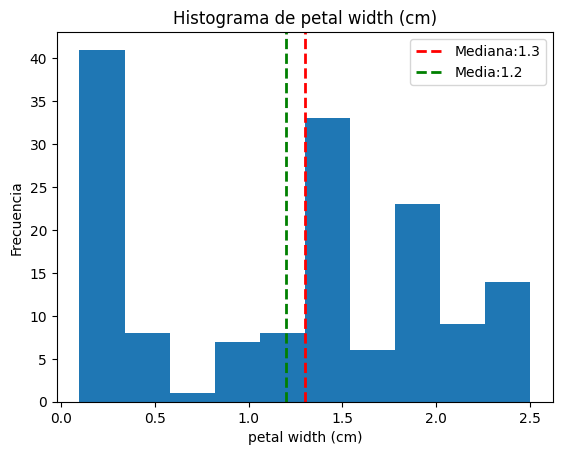

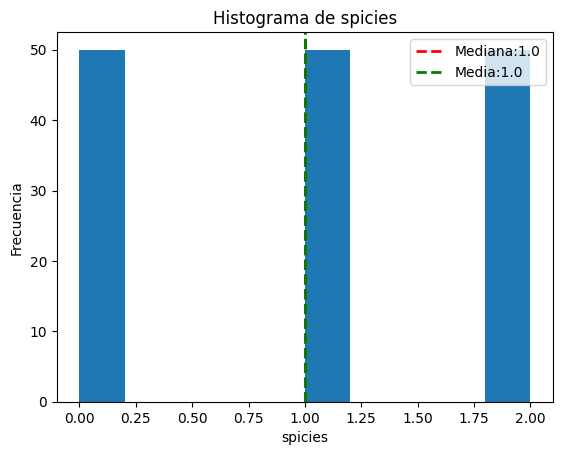

In [46]:
for col in df.select_dtypes(include=[np.number]):
  if col !='spiecies':
    #Estadísticos
    media=df[col].mean().round(2)
    mediana=df[col].median().round(2)

    plt.hist(df[col])
    plt.axvline(x=mediana, color='red',linestyle='dashed', linewidth=2, label=f'Mediana:{mediana}')
    plt.axvline(x=media, color='green',linestyle='dashed', linewidth=2, label=f'Media:{media}')
    plt.ylabel('Frecuencia')
    plt.xlabel(col)
    plt.title(f'Histograma de {col}')

    plt.legend()
    plt.show()

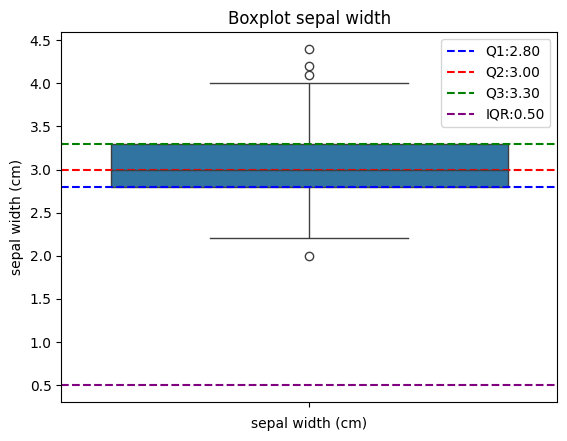

In [47]:

sns.boxplot(df['sepal width (cm)'])

percentiles=df['sepal width (cm)'].quantile([0.25,0.5,0.75])
iqr=percentiles[0.75]-percentiles[0.25]

plt.axhline(y=percentiles[0.25], color='blue', linestyle='--', label=f'Q1:{percentiles[0.25]:.2f}')
plt.axhline(y=percentiles[0.5], color='red', linestyle='--', label=f'Q2:{percentiles[0.5]:.2f}')
plt.axhline(y=percentiles[0.75], color='green', linestyle='--', label=f'Q3:{percentiles[0.75]:.2f}')
plt.axhline(y=iqr, color='purple', linestyle='--', label=f'IQR:{iqr:.2f}')

plt.xlabel('sepal width (cm)')
plt.title('Boxplot sepal width')
plt.legend()
plt.show()

In [48]:
matriz_correlacion = df.corr()

In [49]:
print(matriz_correlacion)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
spicies                     0.782561         -0.426658           0.949035   

                   petal width (cm)   spicies  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
spicies                    0.956547  1.000000  


In [50]:
numericas = df.drop(columns=['spicies'])

matriz_correlacion = numericas.corr()

print(matriz_correlacion)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


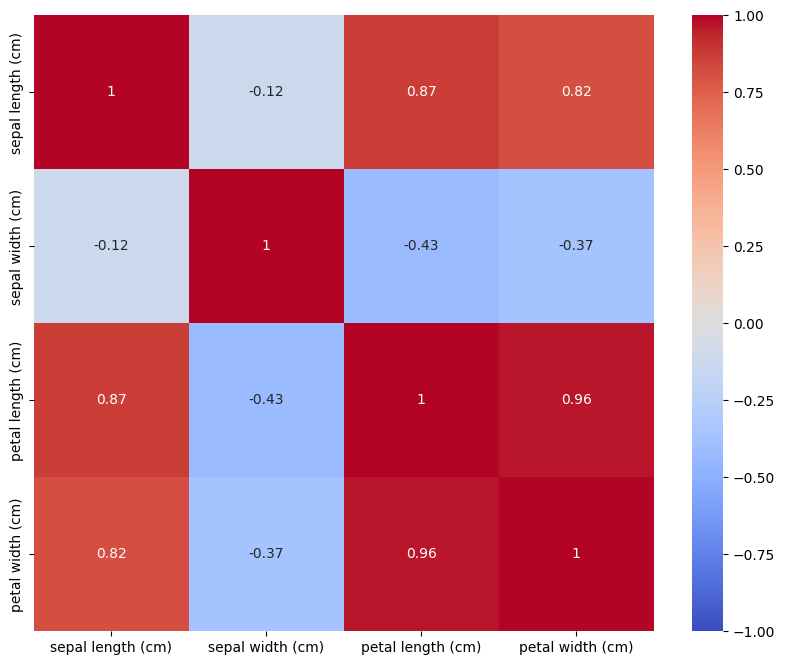

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

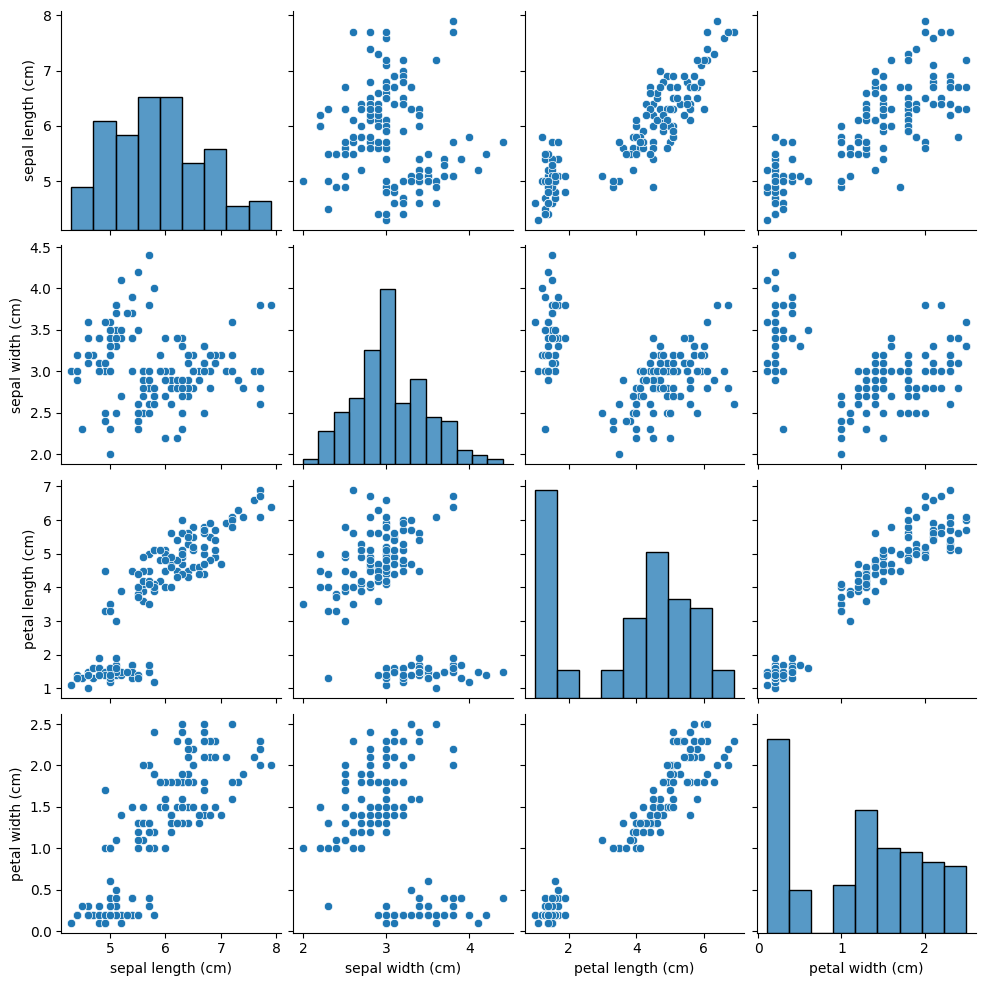

In [52]:
sns.pairplot(numericas)
plt.show()

##Grafico de correlacion

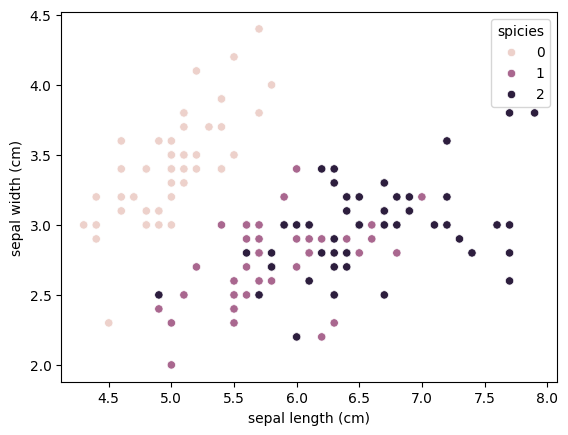

In [53]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='spicies', data=df)
plt.show()

##Interpretacion

1. Diferenciacion de especies:

* Tres grupos distintos de datos cada uno representando a una espcie por medio de color, los grupos corresponden a 0 , 1 , 2.

2. Tendencias Generales

* En general se observa una correlacion positiva entre la longitud del sepalo el ancho del sepalo. A medida que la longitud del sepalo aumenta, tambien tiende a aumentar el ancho del sepalo.

3. Diferencia entre especies

* La especie 0 es la que presenta una correlacion menos pronunciada entre la longitud y el ancho del sepalo en comparacion a las otra especies

* Las espcies 1 y 2 tienen una relacion mas fuerte

En resumen, el grafico permite visualizar las diferencias de sepalo entre las espcies de flores.

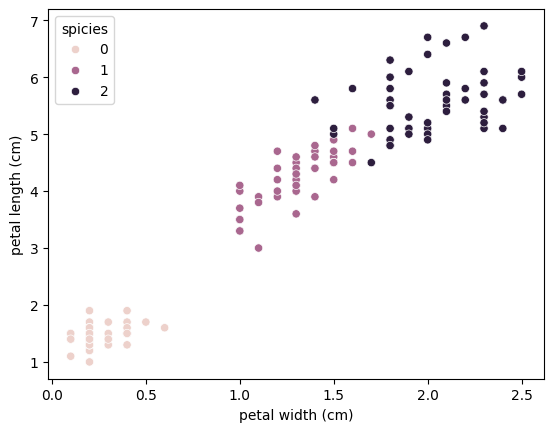

In [54]:
sns.scatterplot(x='petal width (cm)', y='petal length (cm)', hue='spicies', data=df)
plt.show()

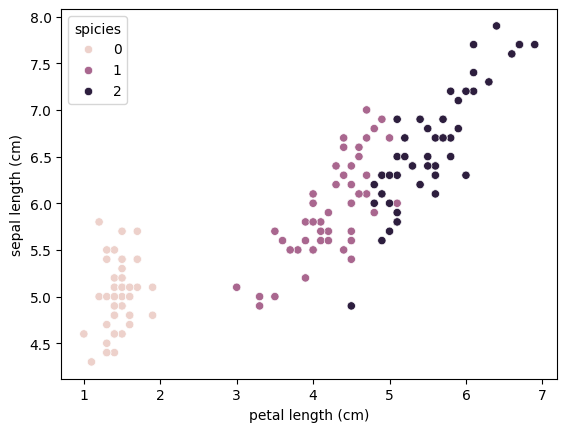

In [55]:
sns.scatterplot(x='petal length (cm)', y='sepal length (cm)', hue='spicies', data=df)
plt.show()

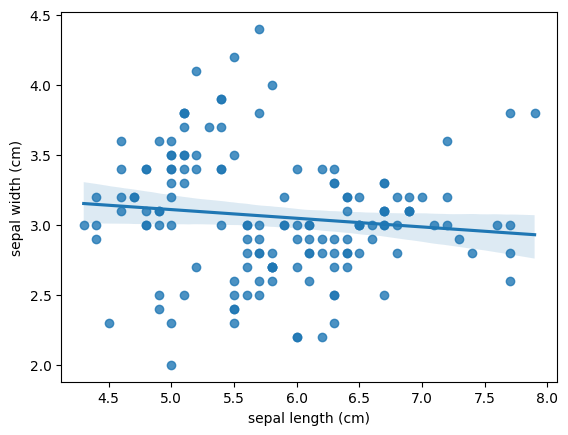

In [56]:
sns.regplot(x='sepal length (cm)', y='sepal width (cm)', data=df)
plt.show()

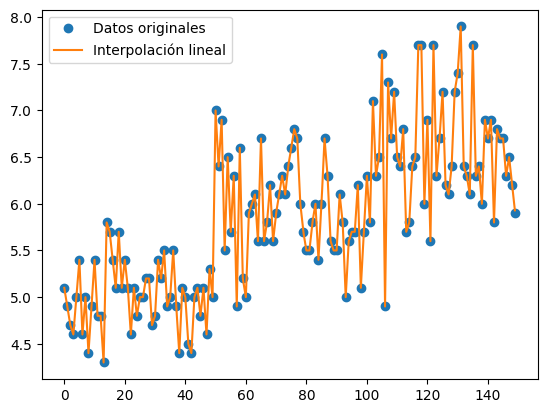

In [72]:
variable = 'sepal length (cm)'

valores = df[variable]

indices = np.sort(df.index)

interpolador =interp1d(indices, valores,kind= 'linear' )

nuevos_indices = np.arange(df.index.min(), df.index.max(),0.1)

valores_interpolados = interpolador(nuevos_indices)

plt.plot(indices, valores,'o',label='Datos originales')
plt.plot(nuevos_indices, valores_interpolados, label='Interpolación lineal')

plt.legend()
plt.show()

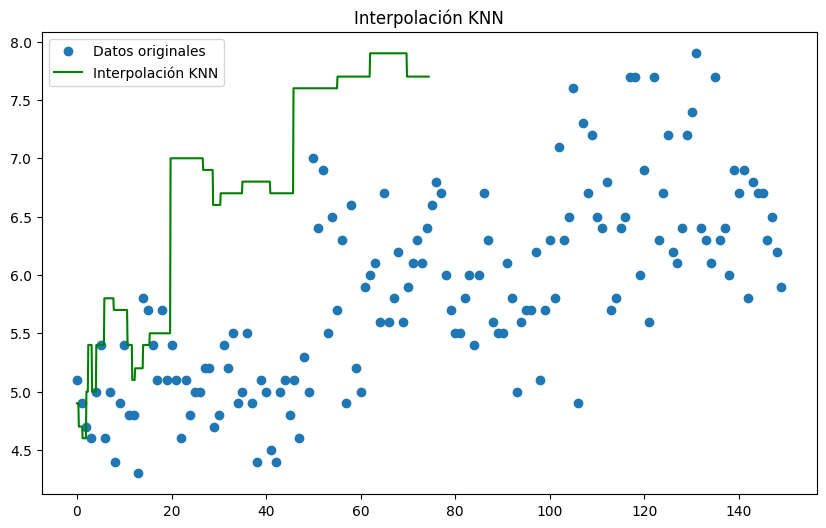

In [81]:
interpolador_knn = NearestNDInterpolator(np.vstack([indices,valores]).T,y=valores)

nuevoss_indices = np.ravel(nuevos_indices)

valores_interpolados_knn = interpolador_knn(nuevoss_indices)

nuevos_indices_muestra = nuevoss_indices[:len(valores_interpolados_knn)]

plt.figure(figsize=(10, 6))
plt.plot(indices, valores, 'o', label='Datos originales')
plt.plot(nuevos_indices_muestra, valores_interpolados_knn, label='Interpolación KNN',color='green')
plt.legend()
plt.title('Interpolación KNN')
plt.show()